## 8. Write a program to do the forecasting using ARMA(p,q) model and evaluate the model performance using Root Mean Squared Error (RMSE) for the forecasts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
df = pd.read_csv('catfish.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [4]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

In [5]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = df[start_date:end_date]

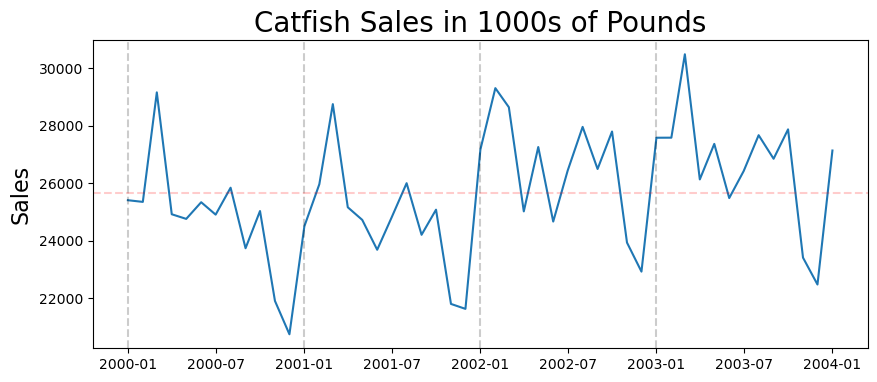

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

mean_sales = lim_catfish_sales.mean().item()

plt.axhline(mean_sales, color='r', alpha=0.2, linestyle='--')
plt.show()

In [7]:
first_diff = lim_catfish_sales.diff()[1:]

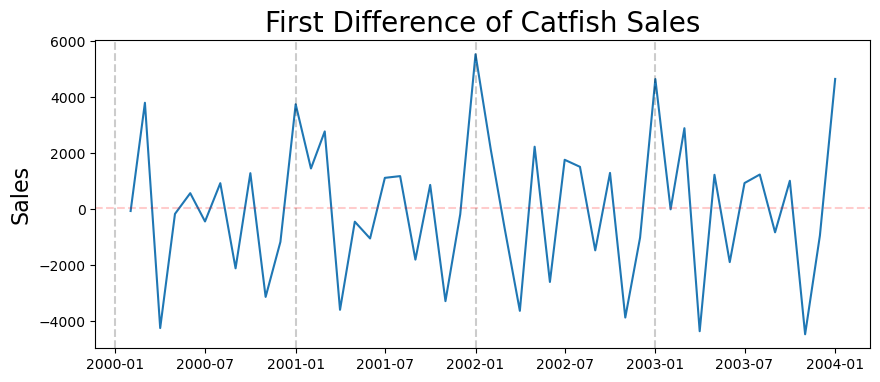

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

mean_first_diff = first_diff.mean().item()

plt.axhline(mean_first_diff, color='r', alpha=0.2, linestyle='--')
plt.show()

In [9]:
df.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

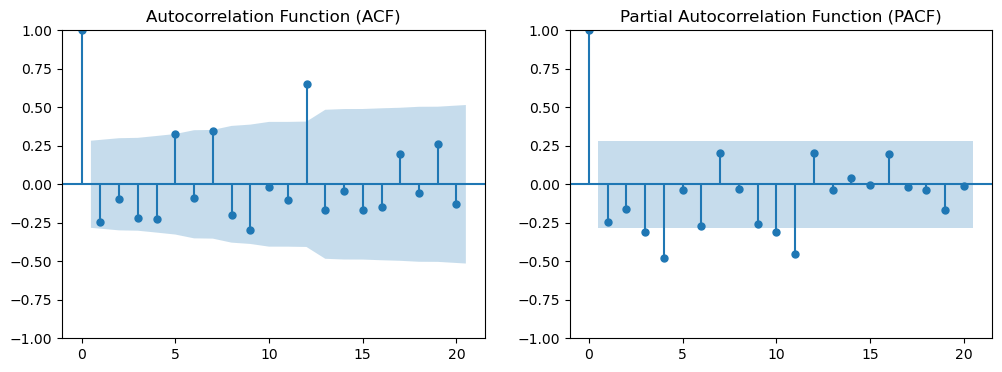

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# ACF plot
plot_acf(first_diff, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(first_diff, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

### Based on ACF, we should start with a MA(1) process and based on PACF, we should start with a AR(4) process

In [11]:
# Get training and testing sets
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

### Fitting the ARMA Model

In [12]:
# define model
model = ARIMA(train_data, order=(5,0,5))

In [13]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -366.584
Date:                Thu, 18 Jan 2024   AIC                            757.169
Time:                        22:33:11   BIC                            778.021
Sample:                    02-01-2000   HQIC                           764.812
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2517     74.444      0.326      0.745    -121.655     170.158
ar.L1         -0.1306      0.390     -0.335      0.738      -0.895       0.634
ar.L2          0.1950      0.331      0.590      0.5

In [14]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [15]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

Text(0, 0.5, 'Sales')

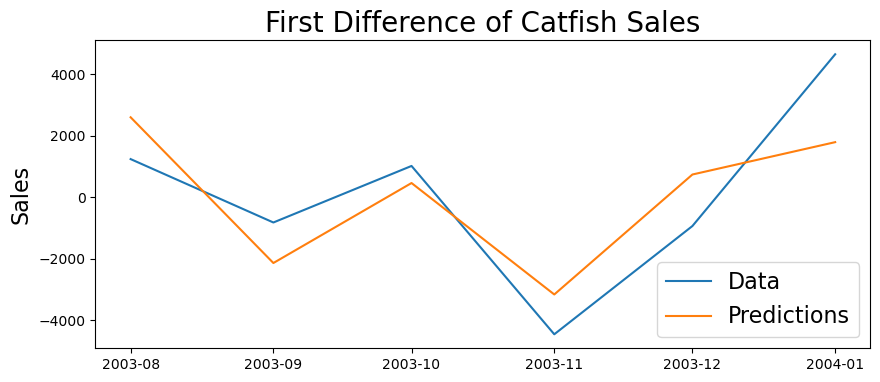

In [16]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1662.560931133872
